# O Naufrágio do Titanic
O naufrágio do Titanic é um dos mais infames naufrágios da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia barcos salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas eram mais propensos a sobreviver do que outros.

Nesse desafio, pedimos que você construa um modelo preditivo que responda à pergunta: “que tipo de pessoas têm maior probabilidade de sobreviver?” Usando dados de passageiros (por exemplo, nome, idade, sexo, classe socioeconômica etc.).

# Definição das variáveis
- pclass: classe do passageiro (1 = primeira, 2 = segunda,3 = terceira);
- survived: sobreviveu (0 = não, 1 = sim); 
- name: nome;
- sex: sexo;
- age: idade;
- sibsp: número de irmãos/esposa(o) a bordo;
- parch: número de pais/filhos a bordo;
- ticket: número da passagem;
- fare: preço da passagem;
- cabin: cabine;
- embarked: (local em que o passageiro embarcou C = Cherbourg, Q = Queenstown, S = Southampton) 
- boat: bote salva-vidas;
- body: número de identificação do corpo;
- home.dest: lar/destino

# Pré-processamento - Corrigindo dados ausentes
### A maioria dos algoritmos não funcionará se houver dados ausentes. Exceções dignas de nota são as recentes bibliotecas inovadoras XGBoost, CatBoost e LightGBM.


## Maneiras de trabalhar dados ausentes:
- Remover qualquer linha com dados ausentes; 
- Remover qualquer coluna com dados ausentes; 
- Rmputar dados aos valores ausentes; 
- Criar uma coluna para informar que os dados estavam ausentes.

In [1]:
# gráficos estáticos logo abaixo da célula,
%matplotlib inline

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#A biblioteca Missingno oferece uma maneira muito boa de visualizar a distribuição de valores NaN
import missingno as msno
import statistics  as sts

In [12]:
url = "https://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic3.xls"
df = pd.read_excel(url)

In [13]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [14]:
#Verificando quantas linhas e colunas tem
df.shape

(1309, 14)

In [10]:
#Verificando a quantidade de valores nulos
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [11]:
orig_df = df.copy()
#Obtendo a média de dados ausentes em percentual
df.isnull().mean() * 100  

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

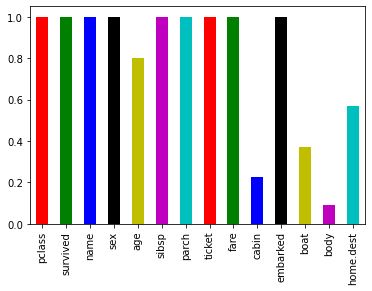

In [15]:
#Percentual de dados não ausentes
fig, ax = plt.subplots(figsize=(6, 4))
colors = 'rgbkymc'
graf = (1 - df.isnull().mean()).abs().plot.bar(ax=ax,color=list(colors))
#fig.savefig("mlpr_0402.png", dpi=300)

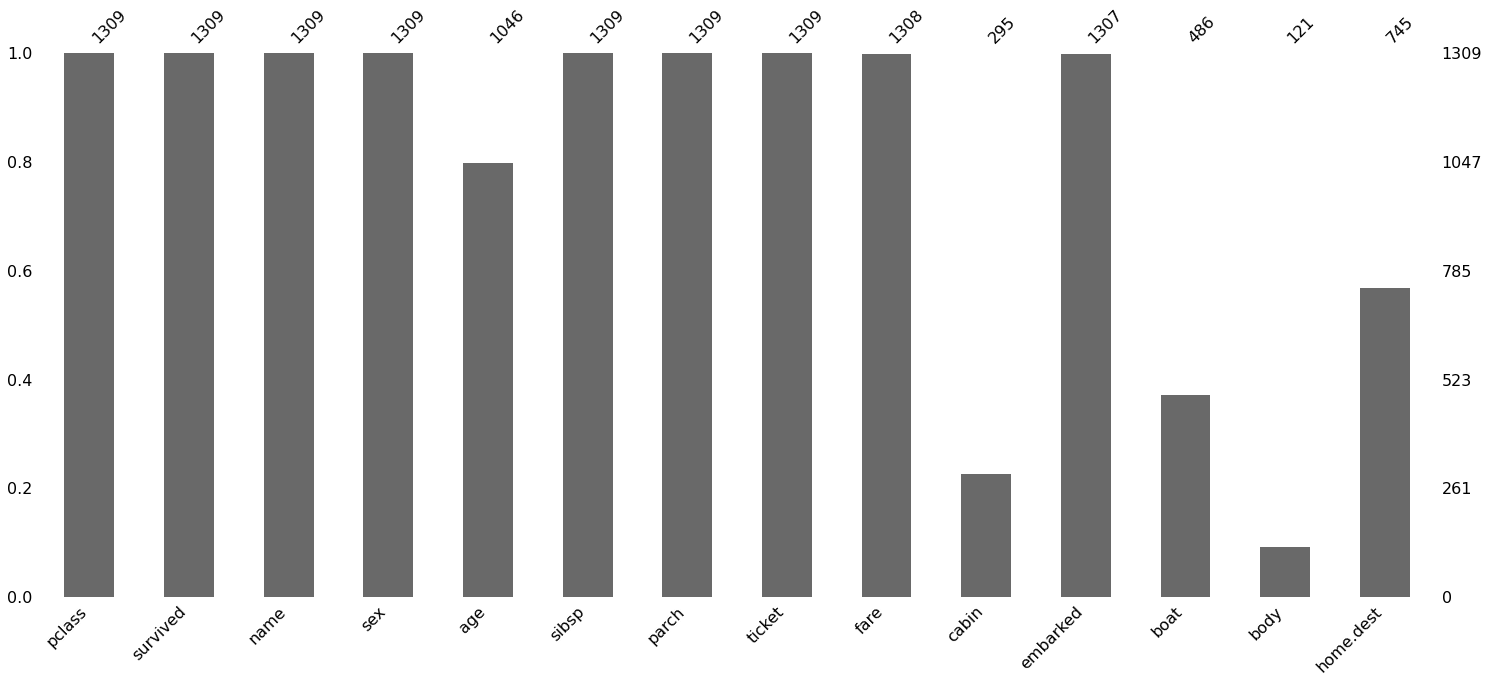

In [16]:
#Percentual de dados não ausentes gerado com missingno. 
ax = msno.bar(orig_df)
#Por amostra de 500
#ax = msno.bar(orig_df.sample(500))

## Descartando dados ausentes 

In [22]:
df1 = df.dropna()

In [23]:
df1.isnull().sum()

pclass       0.0
survived     0.0
name         0.0
sex          0.0
age          0.0
sibsp        0.0
parch        0.0
ticket       0.0
fare         0.0
cabin        0.0
embarked     0.0
boat         0.0
body         0.0
home.dest    0.0
dtype: float64

In [25]:
#Deleto todas as colunas que tem valores nulos
# axis-1 vou mexer nas colunas
df1 = df.dropna(axis=1)

In [26]:
df1.isnull().sum()

pclass      0
survived    0
name        0
sex         0
sibsp       0
parch       0
ticket      0
dtype: int64

In [7]:
display(df)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


## Inputando dados

In [27]:
df1 = df.copy()
df1.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   classe          1309 non-null   int64  
 1   sobreviveu      1309 non-null   int64  
 2   sexo            1309 non-null   object 
 3   idade           1309 non-null   float64
 4   irmaos_conjuge  1309 non-null   int64  
 5   pais_filhos     1309 non-null   int64  
 6   bilhete         1309 non-null   object 
 7   tarifa          1309 non-null   float64
 8   embarque        1309 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 92.2+ KB


In [29]:
#Usando o pandas
df['age'].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [30]:
#Substituir pela mediana pelo pandas
mediana = sts.median(df['age'])
print(mediana)

3.0


In [31]:
#Substituir pela moda pela pandas
moda = sts.mode(df['age'])
print(moda)

24.0


In [32]:
#Substituir pela media pelo pandas
#Vai dar errado na média, pois tem valores nulos
media = sts.mean(df['age'])
print(media)

nan


In [33]:
#Vamos substituir pelo pandas, mais à frente faremos uma regressão
df1['age'].fillna(mediana, inplace=True)

In [35]:
df1.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [38]:
#Usando a biblioteca SimpleImputer
from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(
    include="number"
).columns
#im = SimpleImputer()  # mean
im = SimpleImputer(strategy="median") #mediana
#im = SimpleImputer(strategy="most_frequent") #mais frequente ou a moda
imputed = im.fit_transform(df[num_cols])

In [41]:
imputed

array([[  1.    ,   1.    ,  29.    , ...,   0.    , 211.3375, 155.    ],
       [  1.    ,   1.    ,   0.9167, ...,   2.    , 151.55  , 155.    ],
       [  1.    ,   0.    ,   2.    , ...,   2.    , 151.55  , 155.    ],
       ...,
       [  3.    ,   0.    ,  26.5   , ...,   0.    ,   7.225 , 304.    ],
       [  3.    ,   0.    ,  27.    , ...,   0.    ,   7.225 , 155.    ],
       [  3.    ,   0.    ,  29.    , ...,   0.    ,   7.875 , 155.    ]])

In [42]:
#Acrescentando colunas informativas
#O pandas permite inserir alguns algumas informções
#Neste exempplo vou fornecer a informação mostrando  0 para valores nullos e 1 para valores preenchidos.    
def add_indicator(col):
    def wrapper(df):
        return df[col].isna().astype(int)

    return wrapper

In [43]:
#acrescentar uma nova coluna para informar que um valor estava ausente:
df1 = df.assign(
    cabin_missing=add_indicator("cabin")
)

In [44]:
df1

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin_missing
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,1
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,1
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,1


### Vamos deixar os nossos dados prontos para a segunda etapa.

In [45]:
df1 = orig_df.copy()
display(df1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [46]:
df1.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

### Traduzir as colunas

In [47]:
df1.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [48]:
df1.columns = ['classe','sobreviveu', 'nome', 'sexo', 'idade','irmaos_conjuge','pais_filhos',
                 'bilhete','tarifa','cabine','embarque','bote','corpo','lar_destino']

In [49]:
display(df1)

,classe,sobreviveu,nome,sexo,idade,irmaos_conjuge,pais_filhos,bilhete,tarifa,cabine,embarque,bote,corpo,lar_destino
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


### Excluir colunas 
#### As colunas bote e corpo

In [50]:
#corpo = número de identificação do corpo. Com o número você sabe quem é e causa um vazamento de informação
#Você sabe que ele sobreviveu. Bote do mesmo jeito e nome
df1.drop(['corpo'],axis=1, inplace=True)
df1.drop(['bote'],axis=1, inplace=True)
df1.drop(['nome'],axis=1, inplace=True)

In [51]:
df1.head()

,classe,sobreviveu,sexo,idade,irmaos_conjuge,pais_filhos,bilhete,tarifa,cabine,embarque,lar_destino
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


In [52]:
#Cabine,lar_destino não tem importância para o modelo.Não podemos saber quem são, mesmo porque é um dado
#Que não interessa ao modelo
df1.drop(['cabine'],axis=1, inplace=True)
df1.drop(['lar_destino'],axis=1, inplace=True)

# Obs:  Se você tem certeza que os campos não têm importancia delete-os, caso contrário só faça isso após analisar a correlação 

In [53]:
df1.head()

,classe,sobreviveu,sexo,idade,irmaos_conjuge,pais_filhos,bilhete,tarifa,embarque
0,1,1,female,29.0000,0,0,24160,211.3375,S
1,1,1,male,0.9167,1,2,113781,151.5500,S
2,1,0,female,2.0000,1,2,113781,151.5500,S
3,1,0,male,30.0000,1,2,113781,151.5500,S
4,1,0,female,25.0000,1,2,113781,151.5500,S


### Vamos analisar as estatísticas

In [54]:
df1.describe()

,classe,sobreviveu,idade,irmaos_conjuge,pais_filhos,tarifa
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [55]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
classe,1309.0,2.294882,0.837836,1.0000,2.0000,3.0000,3.000,3.0000
sobreviveu,1309.0,0.381971,0.486055,0.0000,0.0000,0.0000,1.000,1.0000
idade,1046.0,29.881135,14.413500,0.1667,21.0000,28.0000,39.000,80.0000
irmaos_conjuge,1309.0,0.498854,1.041658,0.0000,0.0000,0.0000,1.000,8.0000
pais_filhos,1309.0,0.385027,0.865560,0.0000,0.0000,0.0000,0.000,9.0000
tarifa,1308.0,33.295479,51.758668,0.0000,7.8958,14.4542,31.275,512.3292


In [57]:
#Substituir idade pela mediana. Mais à frente faremos por regressão linear
#A média é usada para distribuições numéricas normais, que têm uma baixa quantidade de valores discrepantes. 
#A mediana é geralmente utilizada para retornar a tendência central para distribuições numéricas distorcidas
mediana = sts.median(df1['idade'])
mediana

3.0

In [58]:
#Vamos substituir pelo pandas, mais à frente faremos uma regressão
df1['idade'].fillna(mediana, inplace=True)
df1.isnull().sum()

classe            0
sobreviveu        0
sexo              0
idade             0
irmaos_conjuge    0
pais_filhos       0
bilhete           0
tarifa            1
embarque          2
dtype: int64

In [61]:
#Embarque vou preencher pela moda
moda_embarque = sts.mode(df1['embarque'])
moda_embarque

'S'

In [62]:
df1['embarque'].fillna(moda_embarque,inplace=True)
df1.isnull().sum()

classe            0
sobreviveu        0
sexo              0
idade             0
irmaos_conjuge    0
pais_filhos       0
bilhete           0
tarifa            1
embarque          0
dtype: int64

In [63]:
#Substituir a tarida
mediana = sts.median(df1['tarifa'])
mediana

16.1

In [64]:
#Vamos substituir pelo pandas, mais à frente faremos uma regressão
df1['tarifa'].fillna(mediana, inplace=True)
df1.isnull().sum()

classe            0
sobreviveu        0
sexo              0
idade             0
irmaos_conjuge    0
pais_filhos       0
bilhete           0
tarifa            0
embarque          0
dtype: int64

In [61]:
df1.to_csv("titanic3_idade.csv",index = False)

# Referências

### Matplotlib. Disponível em: https://matplotlib.org/ . Acesso 19/09/2022

### Harrison, Matt. Machine Learning – Guia de Referência Rápida. Novatec Editora. Edição do Kindle. 

### Pyjanitor. Disponível em:<https://pyjanitor-devs.github.io/pyjanitor/> Acesso em 26/09/2022.